## Práctica Pandas y Jupyter

## 1. Carga y Exploración de Datos

#### 1.1 Carga de Datos

In [177]:
import pandas as pd
import matplotlib.pyplot as plt #Librería para crear gráficos

In [178]:
df = pd.read_csv('ModalidadVirtual.csv') #Leer un archivo en formato csv

#### 1.2 Muestra las primeras 5 filas, las últimas 5 filas, y un resumen estadístico de los datos

In [179]:
print(df.head()) #El método head() muestra una cantidad de filas iniciales específicas y si no se específica devuelve 5

   Unnamed: 0        time                 carrera acepta  \
0           0  2020-11-08  Ingeniería de Sistemas     Si   
1           1  2020-11-08              Psicología     Si   
2           2  2020-11-08  Ingeniería de Sistemas     Si   
3           3  2020-11-08  Ingeniería de Sistemas     Si   
4           4  2020-11-08  Ingeniería de Sistemas     Si   

                        positivo  \
0              Horario flexible.   
1  Acceso desde cualquier lugar.   
2              Horario flexible.   
3              Horario flexible.   
4  Acceso desde cualquier lugar.   

                                            negativo  edad    sexo   trabajo  
0             Contacto Personal Docente-Estudiantil.    20  Hombre  Eventual  
1             Contacto Personal Docente-Estudiantil.    26  Hombre  Eventual  
2  Falta de recursos de calidad(plataformas, doce...    20   Mujer        Sí  
3                               Conexión a internet.    18   Mujer        No  
4             Contacto Pers

In [180]:
print(df.tail()) #El método tail() muestra una cantidad de filas finales específicas y si no se específica devuelve 5

     Unnamed: 0        time                       carrera acepta  \
217         230  2020-12-10  Gestión Turística y Hotelera     Si   
218         231  2020-12-11        Ingeniería de Sistemas     No   
219         232  2020-12-11  Gestión Turística y Hotelera     No   
220         233  2020-12-11         Ingeniería Agronómica     Si   
221         234  2020-12-12        Comercio Internacional     Si   

                          positivo  \
217              Horario flexible.   
218  Acceso desde cualquier lugar.   
219              Horario flexible.   
220  Acceso desde cualquier lugar.   
221              Horario flexible.   

                                              negativo  edad    sexo trabajo  
217                               Conexión a internet.    19   Mujer      Sí  
218  Falta de recursos de calidad(plataformas, doce...    23   Mujer      No  
219  Falta de recursos de calidad(plataformas, doce...    25  Hombre      Sí  
220             Contacto Personal Docente-Estu

In [181]:
print(df.describe()) #describe() Muestra los datos estadístico de los datos

       Unnamed: 0        edad
count  222.000000  222.000000
mean   119.896396   28.166667
std     67.424522    7.556374
min      0.000000   17.000000
25%     63.250000   22.000000
50%    121.500000   27.000000
75%    177.750000   33.000000
max    234.000000   54.000000


####  1.3 Muestra la información del DataFrame (tipos de datos, columnas, etc.).

In [182]:
print(df.info()) #El método info() muestra las columnas y el tipo de dato de la columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  222 non-null    int64 
 1   time        222 non-null    object
 2   carrera     222 non-null    object
 3   acepta      222 non-null    object
 4   positivo    222 non-null    object
 5   negativo    222 non-null    object
 6   edad        222 non-null    int64 
 7   sexo        222 non-null    object
 8   trabajo     222 non-null    object
dtypes: int64(2), object(7)
memory usage: 15.7+ KB
None


#### 1.4 Valores faltantes: Identifica y cuenta los valores faltantes en cada columna.

In [183]:
print(df.isnull().sum()) #isnull detecta todos los valores nulos y sum() ayuda a sumar

Unnamed: 0    0
time          0
carrera       0
acepta        0
positivo      0
negativo      0
edad          0
sexo          0
trabajo       0
dtype: int64


## 2. Limpieza de Datos

#### 2.2 Rellena los valores faltantes con cero

In [184]:
df = df.fillna(0) #fillna Rellena los valoes faltantes con cero

#### 2.3 Eliminar las filas con valores nulos

In [185]:
df = df.dropna() 

Eliminar columnas:
**df = df.drop(columns=[columna_innecesaria])**

## 3. Filtrado y Selección de Datos

#### 3.1 Filtra las filas que cumplan con múltiples condiciones.

In [186]:
# df = df[df['Modalidad'] == 'Virtual'] #Muestra los datos de columna Modalidad que son Virtual
df = df[(df['edad'] > 20) & (df['edad'] < 30)]

#### 3.2 Seleccionar columnas: Selecciona solo ciertas columnas para un nuevo DataFrame.

In [187]:
df = df[['edad', 'sexo']]
print(df)

     edad    sexo
1      26  Hombre
5      25   Mujer
9      25  Hombre
11     21  Hombre
12     25  Hombre
..    ...     ...
213    26  Hombre
215    21   Mujer
218    23   Mujer
219    25  Hombre
221    23  Hombre

[86 rows x 2 columns]


## 4. Agregación y Agrupación

#### 4.1 Agregación: Calcula la suma, media de una columna

In [188]:
print(f"Total de datos: {df['edad'].count()}")
print(f"Suma: {df['edad'].sum()}")
print(f"Promedio: {df['edad'].mean()}")
print(f"Desviación: {df['edad'].std()}")

Total de datos: 86
Suma: 2107
Promedio: 24.5
Desviación: 2.4530892887996414


#### 4.2 Agrupación: Agrupa los datos por una columna y calcula la media de otra columna para cada grupo.

In [189]:
print(df.groupby('sexo').mean())

             edad
sexo             
Hombre  24.437500
Mujer   24.578947


#### 4.3 Pivot Table: Crea una tabla pivote para resumir los datos.

In [190]:
print(pd.pivot_table(df, index='sexo', values='edad', aggfunc='sum'))
#print(pd.pivot_table(df, columns='sexo', values='edad', aggfunc='sum'))

        edad
sexo        
Hombre  1173
Mujer    934


## 5. Manipulación de Datos


####  5.1 Ordena el DataFrame por una columna específica.

Por edad:

In [191]:
print(df.sort_values(by='edad'))

     edad    sexo
11     21  Hombre
42     21  Hombre
58     21  Hombre
47     21  Hombre
71     21  Hombre
..    ...     ...
94     29   Mujer
95     29  Hombre
26     29  Hombre
39     29  Hombre
205    29  Hombre

[86 rows x 2 columns]


## 6. Análisis de Datos

#### Gráfica Circular

In [192]:
mujeres = (df['sexo'] == 'Mujer').sum()
hombres = (df['sexo'] == 'Hombre').sum()

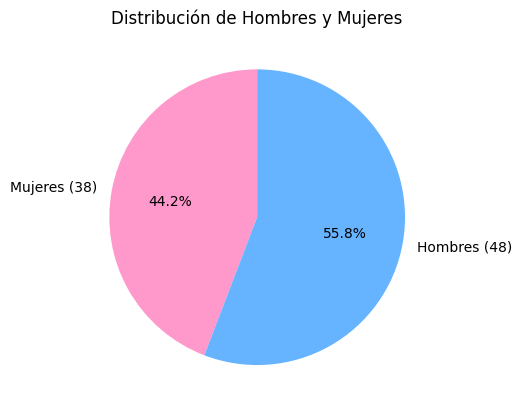

In [193]:
#Datos para el gráfico circular
#Obtención de Datos
labels = [f'Mujeres ({mujeres})', f'Hombres ({hombres})']
sizes = [mujeres, hombres]
colors = ['#ff99cc', '#66b3ff']

#Crear el gráfico
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

#Título
plt.title('Distribución de Hombres y Mujeres')

#Mostrar la gráfica circular
plt.show()

Promedio de Edades por sexo

In [194]:
promedio_edad_mujer = df.query("sexo == 'Mujer'")['edad'].mean()
promedio_edad_hombre = df.query("sexo == 'Hombre'")['edad'].mean()

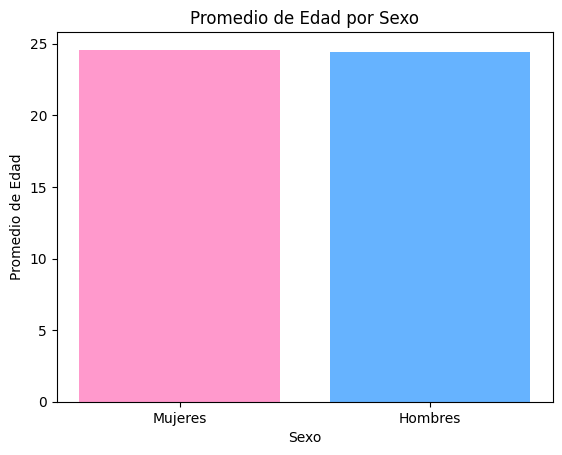

In [195]:
# Datos para la gráfica de barras
etiquetas = ['Mujeres', 'Hombres']
promedios = [promedio_edad_mujer, promedio_edad_hombre]

# Crear la gráfica de barras
plt.bar(etiquetas, promedios, color=['#ff99cc', '#66b3ff'])

# Añadir título y etiquetas
plt.title('Promedio de Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Promedio de Edad')

# Mostrar la gráfica
plt.show()

Edades por rangos

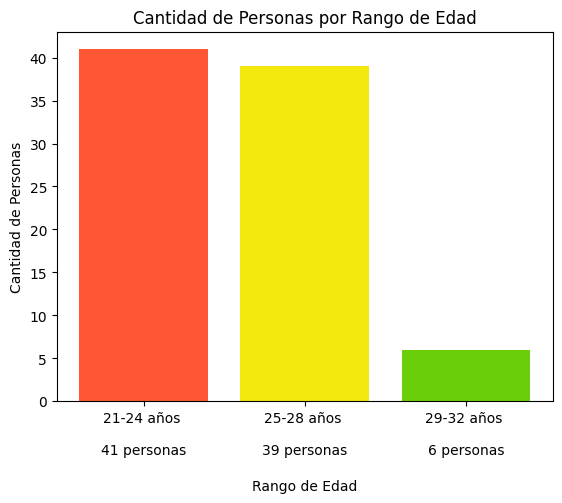

In [196]:
edad21_a_24 = df[(df['edad'] > 20) & (df['edad'] < 25)]['edad'].count()
edad25_28 = df[(df['edad'] > 24) & (df['edad'] < 29)]['edad'].count()
edad29_32 = df[(df['edad'] > 28) & (df['edad'] < 33)]['edad'].count()

# Datos para la gráfica
etiquetasRangos = [f'21-24 años \n\n{edad21_a_24} personas', f'25-28 años \n\n{edad25_28} personas', f'29-32 años \n\n{edad29_32} personas']
rangos = [edad21_a_24, edad25_28, edad29_32]

# Crear la gráfica de barras y asignar a la variable 'bars'
plt.bar(etiquetasRangos, rangos, color=['#ff5733', '#f3e80c', '#6acf0a'])

# Añadir título y etiquetas
plt.title('Cantidad de Personas por Rango de Edad')
plt.xlabel('\nRango de Edad')
plt.ylabel('Cantidad de Personas')

# Mostrar la gráfica    
plt.show()

## 7. Guardar Resultados

In [197]:
#df.to_csv('ModalidadVirtualNuevo.csv', index=False, encoding='utf-8')
df.sort_values('edad').to_csv('ModalidadVirtualNuevo.csv', index=False)